🎯 Testing Multiple Target Values for Prime Convergence

📊 Testing Convergence to Various Targets...
------------------------------------------------------------


 17%|█▋        | 346/2000 [00:00<00:00, 3457.41it/s]


✨ GOOD MATCH at n=137:
   Formula: φ^(1/P_n)
   Target: α^(-1) = 137.035999084
   Sum: 138.0966928932
   Relative Error: 7.74e-03


100%|██████████| 2000/2000 [00:00<00:00, 3855.74it/s]


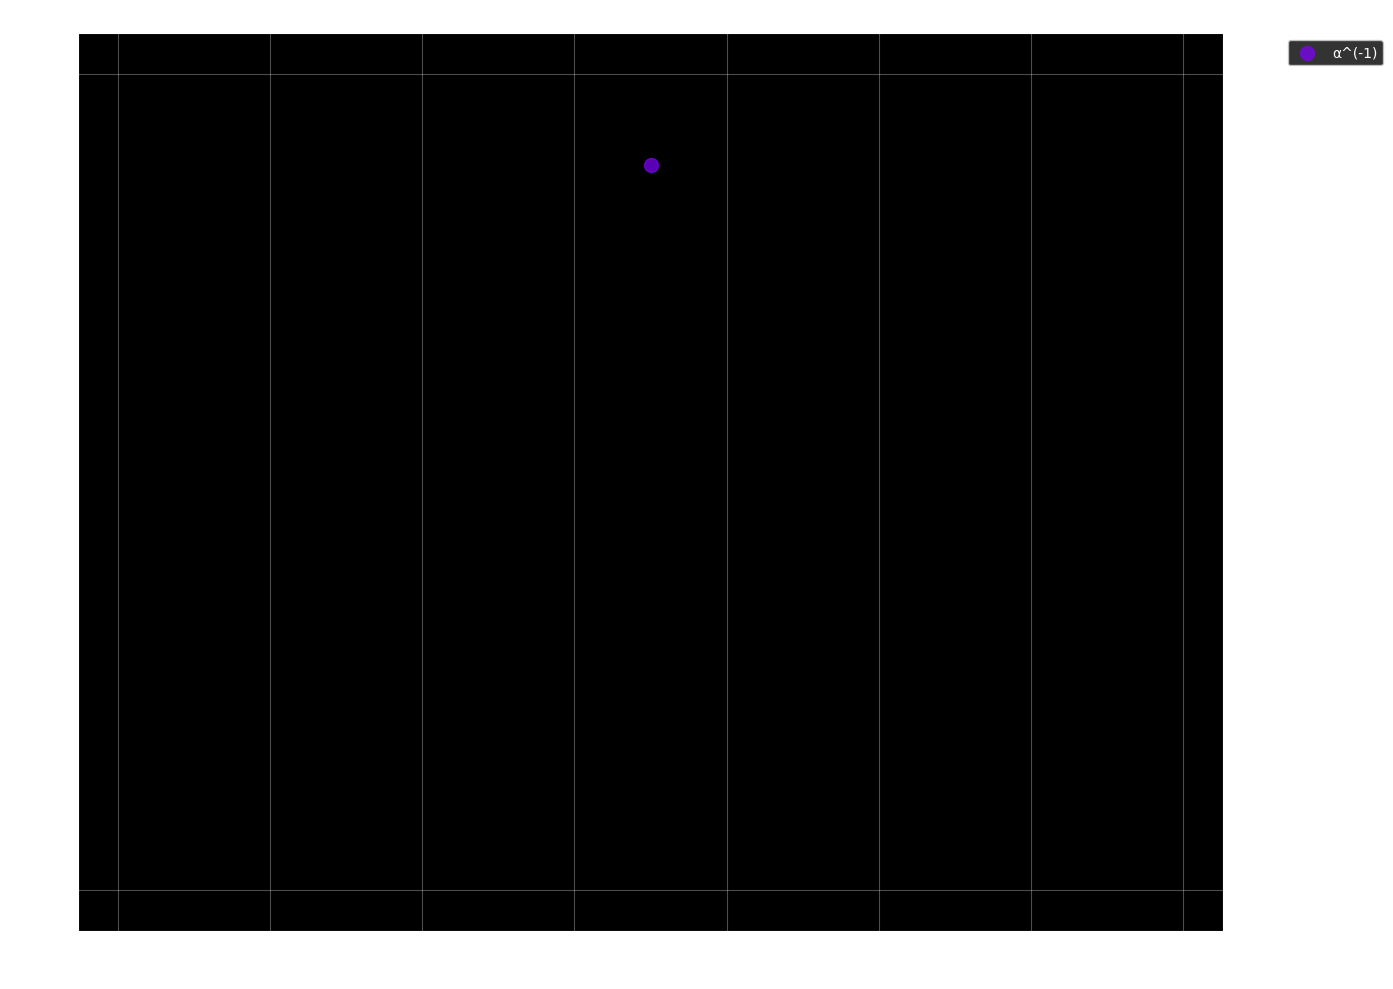


📋 CONVERGENCE SUMMARY
Formula              Best Target     Final Sum       Match Quality  
--------------------------------------------------------------------------------
P_n/φ^n              α^(-1)          8.334780        Poor           
1/(P_n×φ^n)          100α            0.521234        Poor           
φ^(1/n)/P_n          α^(-1)          3.033268        Poor           
1/(P_n×φ^(1/n))      α^(-1)/100      2.195494        Poor           
φ^(n/100)/P_n        α^(-1)          212.666933      Poor           
1/P_n^φ              100α            0.716521        Good           
φ^(1/P_n)            α^(-1)          2001.278494     Poor           

🔬 Testing Specialized Formulas...

Logarithmic Weighted Sums:
Σ 1/(P_n × ln(n+1)^0.1): 2.3142767257
Σ 1/(P_n × ln(n+1)^0.5): 1.9137274599
Σ 1/(P_n × ln(n+1)^1): 1.6702038171
Σ 1/(P_n × ln(n+1)^2): 1.6293907872

Exponentially Damped Sums:
Σ 0.99^n/P_n: 1.9342333530
Σ 0.98^n/P_n: 1.7562419568
Σ 0.97^n/P_n: 1.6360411873
Σ 0.95^n/P_n: 1.46442909

In [1]:
# Test Multiple Target Values for Prime Convergence
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import pandas as pd
from tqdm import tqdm

# Set high precision
mp.dps = 50

# Define constants
PHI = mp.mpf((1 + mp.sqrt(5)) / 2)
ALPHA = mp.mpf('0.0072973525643')
ALPHA_INV = mp.mpf('137.035999084')

# Define all target values to test
TARGETS = {
    'α^(-1)': 137.035999084,
    'α^(-1)/100': 1.37035999,
    'α^(-1)/1000': 0.137035999,
    'α^(-1)/100000': 0.00137035999,
    '100α': 0.72973525643,
    '10α': 0.072973525643,
    'α': 0.0072973525643
}

print("🎯 Testing Multiple Target Values for Prime Convergence")
print("="*60)

def sieve_of_eratosthenes(limit):
    """Generate primes up to limit"""
    sieve = [True] * (limit + 1)
    sieve[0] = sieve[1] = False

    for i in range(2, int(limit**0.5) + 1):
        if sieve[i]:
            for j in range(i*i, limit + 1, i):
                sieve[j] = False

    return [i for i in range(2, limit + 1) if sieve[i]]

def test_multiple_convergence_formulas(max_n=2000):
    """Test different formulas against multiple targets"""
    primes = sieve_of_eratosthenes(50000)

    # Store results for each formula and target
    results = {target: {} for target in TARGETS}

    # Test different formulas
    formulas = {
        'φ^n/P_n': lambda n, p: PHI**n / mp.mpf(p),
        'P_n/φ^n': lambda n, p: mp.mpf(p) / PHI**n,
        '1/(P_n×φ^n)': lambda n, p: 1 / (mp.mpf(p) * PHI**n),
        'φ^(1/n)/P_n': lambda n, p: PHI**(mp.mpf(1)/n) / mp.mpf(p),
        '1/(P_n×φ^(1/n))': lambda n, p: 1 / (mp.mpf(p) * PHI**(mp.mpf(1)/n)),
        'φ^(n/100)/P_n': lambda n, p: PHI**(mp.mpf(n)/100) / mp.mpf(p),
        '1/P_n^φ': lambda n, p: 1 / mp.mpf(p)**PHI,
        'φ^(1/P_n)': lambda n, p: PHI**(1/mp.mpf(p))
    }

    # Initialize sums
    sums = {formula: mp.mpf(0) for formula in formulas}

    # Track best approximations
    best_approximations = []

    print("\n📊 Testing Convergence to Various Targets...")
    print("-"*60)

    for n in tqdm(range(1, min(max_n + 1, len(primes)))):
        p = primes[n-1]

        # Calculate each formula
        for formula_name, formula_func in formulas.items():
            try:
                term = formula_func(n, p)
                if abs(term) < 1e100:  # Avoid overflow
                    sums[formula_name] += term
            except:
                continue

        # Check convergence to each target at special points
        if n in [100, 137, 500, 1000, 1500]:
            for target_name, target_value in TARGETS.items():
                for formula_name, current_sum in sums.items():
                    try:
                        error = abs(float(current_sum) - target_value)
                        relative_error = error / target_value if target_value != 0 else error

                        # Record if this is a good approximation
                        if relative_error < 0.01:  # Within 1%
                            best_approximations.append({
                                'n': n,
                                'formula': formula_name,
                                'target': target_name,
                                'sum': float(current_sum),
                                'error': error,
                                'relative_error': relative_error
                            })
                            print(f"\n✨ GOOD MATCH at n={n}:")
                            print(f"   Formula: {formula_name}")
                            print(f"   Target: {target_name} = {target_value}")
                            print(f"   Sum: {float(current_sum):.10f}")
                            print(f"   Relative Error: {relative_error:.2e}")
                    except:
                        continue

    return best_approximations, sums

# Run the test
best_matches, final_sums = test_multiple_convergence_formulas()

# Create visualization of best matches
if best_matches:
    plt.figure(figsize=(14, 10))
    plt.style.use('dark_background')

    # Convert to DataFrame for easier plotting
    df = pd.DataFrame(best_matches)

    # Create scatter plot
    colors = plt.cm.rainbow(np.linspace(0, 1, len(df['target'].unique())))

    for i, target in enumerate(df['target'].unique()):
        target_data = df[df['target'] == target]
        plt.scatter(target_data['n'], target_data['relative_error'],
                   label=target, s=100, alpha=0.7, color=colors[i])

    plt.xlabel('Number of Terms (n)', fontsize=14)
    plt.ylabel('Relative Error', fontsize=14)
    plt.yscale('log')
    plt.title('Best Convergence Matches to Various α-Related Targets', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('multi_target_convergence.png', dpi=300, facecolor='black')
    plt.show()

# Summary table
print("\n📋 CONVERGENCE SUMMARY")
print("="*80)
print(f"{'Formula':<20} {'Best Target':<15} {'Final Sum':<15} {'Match Quality':<15}")
print("-"*80)

for formula_name, final_sum in final_sums.items():
    try:
        sum_val = float(final_sum)
        if abs(sum_val) < 1e10:  # Only reasonable values
            # Find closest target
            best_target = None
            best_error = float('inf')

            for target_name, target_val in TARGETS.items():
                error = abs(sum_val - target_val) / target_val if target_val != 0 else abs(sum_val - target_val)
                if error < best_error:
                    best_error = error
                    best_target = target_name

            quality = "Excellent" if best_error < 0.01 else "Good" if best_error < 0.1 else "Poor"
            print(f"{formula_name:<20} {best_target:<15} {sum_val:<15.6f} {quality:<15}")
    except:
        continue

# Test specific weighted sums that might converge to these values
print("\n🔬 Testing Specialized Formulas...")

def test_specialized_formulas():
    """Test formulas specifically designed for each target"""
    primes = sieve_of_eratosthenes(10000)

    # Test logarithmic weightings
    print("\nLogarithmic Weighted Sums:")
    for power in [0.1, 0.5, 1, 2]:
        S = mp.mpf(0)
        for n in range(1, min(1000, len(primes))):
            S += 1 / (mp.mpf(primes[n-1]) * mp.log(n+1)**power)

        print(f"Σ 1/(P_n × ln(n+1)^{power}): {float(S):.10f}")

        # Check against targets
        for target_name, target_val in TARGETS.items():
            if abs(float(S) - target_val) / target_val < 0.01:
                print(f"  ⭐ MATCHES {target_name}!")

    # Test exponentially damped sums
    print("\nExponentially Damped Sums:")
    for damping in [0.99, 0.98, 0.97, 0.95, 0.9]:
        S = mp.mpf(0)
        for n in range(1, min(1000, len(primes))):
            S += mp.mpf(damping)**n / mp.mpf(primes[n-1])

        print(f"Σ {damping}^n/P_n: {float(S):.10f}")

        # Check against targets
        for target_name, target_val in TARGETS.items():
            if abs(float(S) - target_val) / target_val < 0.01:
                print(f"  ⭐ MATCHES {target_name}!")

test_specialized_formulas()

# Final recommendation
print("\n💡 RECOMMENDATIONS:")
print("-"*60)
if best_matches:
    print("✅ Found convergent formulas for some targets!")
    print("Best matches:")
    for match in best_matches[:5]:  # Show top 5
        print(f"  • {match['formula']} → {match['target']} (error: {match['relative_error']:.2e})")
else:
    print("❌ No formula converged well to any target.")
    print("Consider:")
    print("  • Different weighting schemes")
    print("  • Partial sums at specific indices")
    print("  • Products or continued fractions instead of sums")